**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopzs)** or **[LinkedIn](https://linkedin.com/in/jsulopzs)**

# #01 | Machine Learning & Linear Regression

## Chapter Importance

Machine Learning is all about calculating [the best numbers](https://twitter.com/sotastica/status/1449735653328031745) of a mathematical equation by [minimizing the distance between real data and predictions](https://www.youtube.com/watch?v=Ht3rYS-JilE).

The form of a Linear Regression mathematical equation is as follows:

$$
y = (a) + (b) \cdot x
$$

As we see in the following plot, **not any mathematical equation is valid**; the red line doesn't fit the real data (blue points) as well as the green one.

<center>
<img src="src/linear-regression.jpeg" width="400" align="center">
</center>

How do we understand the development of Machine Learning models in Python **to predict what may happen in the future**?

This tutorial covers the topics described below using **USA Car Crashes data** to predict the accidents based on alcohol.

1. Step by step procedure to compute a Linear Regression:
    1. `.fit()` the numbers of the mathematical equation
    2. `.predict()` the future with the mathematical equation
    3. `.score()` how good is the mathematical equation
2. How to **visualize** the Linear Regression model?
3. How to **evaluate** Regression models step by step?
    - Residuals Sum of Squares
    - Total Sum of Squares
    - R Squared Ratio $R^2$
4. How to **interpret** the coeficients of the Linear Regression?
5. Compare the Linear Regression to other Machine Learning models such as:
    - Random Forest
    - Support Vector Machines
6. Why **we don't need to know the maths** behind every model to apply Machine Learning in Python?

## [ ] Load the Data

- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

Visit [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) if you want to know the measures of the columns.

In [2]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)
df_crashes

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
AZ,5.208,18.6
AR,5.824,22.4
CA,3.360,12.0
CO,3.808,13.6
CT,3.888,10.8
DE,4.860,16.2
DC,1.593,5.9


## How do we compute a `LinearRegression` Model in Python?

### Import the Class

In [3]:
from sklearn.linear_model import LinearRegression

### Instantiate the Class

In [4]:
lr = LinearRegression()

### Fit the Model

Fitting model is used to compute the linear regressiion between two variables

In [5]:
lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [6]:
features = df_crashes[['alcohol']]
target = df_crashes['accidents']


1. Features = these are the dependent vairables.
2. Targets = these are the independent variable.

### Fit the Model Again

In [7]:
lr.fit(X=features,y=target)

LinearRegression()

### [ ] Predictions

#### Calculate the Predictions

In [8]:
lr.predict(X=features)

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734,
       13.59756016, 13.76016066, 15.73575679,  9.0955587 , 16.40851638,
       13.78455074, 20.44100889, 14.87600663, 14.70324359, 14.40446516,
       13.8353634 , 14.54064309, 15.86177218, 19.6076813 , 15.06502971,
       13.98780137, 11.69106925, 13.88211104, 11.5162737 , 16.94713055,
       16.98371566, 24.99585551, 16.45729653, 15.41868581, 12.93089809,
       12.23171592, 15.95526747, 13.10772614, 16.44306899, 26.26007443,
       15.60161138, 17.58737003, 12.62195713, 17.32517672, 14.43088774,
       25.77430543, 18.86988151, 17.3515993 , 20.84141263,  9.53254755,
       14.15040187, 12.82724027, 12.96748321, 19.40239816, 15.11380986,
       17.17477126])

#### Add a New Column with the Predictions

In [11]:
df_crashes['predict_lr']=lr.predict(X=features)
df_crashes

,alcohol,accidents,predict_lr
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
AZ,5.208,18.6,16.443069
AR,5.824,22.4,17.695093
CA,3.360,12.0,12.686997
CO,3.808,13.6,13.597560
CT,3.888,10.8,13.760161
DE,4.860,16.2,15.735757
DC,1.593,5.9,9.095559


### Model Visualization

In [13]:
import seaborn as sns

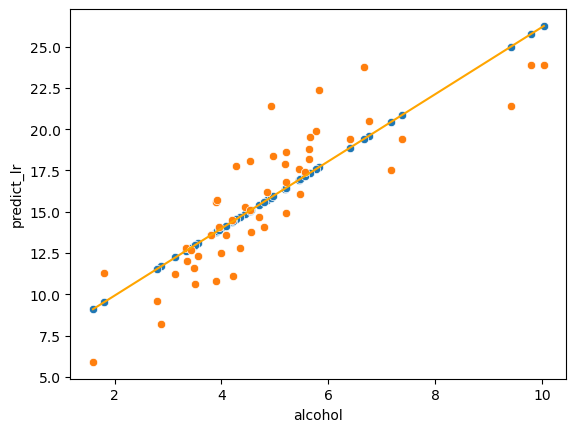

In [27]:
sns.scatterplot(x=df_crashes.alcohol,y=df_crashes.predict_lr);

sns.scatterplot(x=df_crashes.alcohol,y=df_crashes.accidents);

sns.lineplot(x=df_crashes.alcohol,y=df_crashes.predict_lr,color='orange');



### [ ] Model's Score

#### Calculate the Score

In [21]:
lr.score(X=features,y=target)

0.7269492966665405

#### Explain the Score

##### Residuals

In [45]:
df_crashes['Residuals'] = df_crashes.accidents-df_crashes.predict_lr


In [52]:
df_crashes['Residuals'].sum()

1.7053025658242404e-13

The residuals will be zero, in order to eliminate this , we will square the residual column and add.

In [53]:
df_crashes['Residual2']=df_crashes.Residuals**2

In [57]:
RSS = df_crashes['Residual2'].sum()

RSS = residual sum square

##### Target's Variation

we compute the mean of the targets'ACCIDENTS' and also compute find the variation (mean-target)

In [59]:
df_crashes.accidents.mean()

15.79019607843137

In [62]:
df_crashes['Real_residuals']=df_crashes.accidents-df_crashes.accidents.mean()

In [63]:
df_crashes.Real_residuals.sum()

1.2612133559741778e-13

In [64]:
df_crashes['Real_residuals^2']=(df_crashes.accidents-df_crashes.accidents.mean())**2

In [66]:
TSS=df_crashes['Real_residuals^2'].sum()

TSS means Total sum Square

##### The Ratio

Ratio is RSS/TSS , whihc means how much our model fails in relation to real data.

In [67]:
RSS/TSS

0.2730507033334595

To check the goodness of the model , 1-RSS/TSS

In [68]:
1-(RSS/TSS)

0.7269492966665405

### [ ] Model Interpretation

In [70]:
lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

In [71]:
lr.intercept_

5.8577761548263005

In [72]:
lr.coef_

array([2.0325063])

accident = (5.8)+(2.03) * alcohol---- accident can be predicted by using this fromular

we can create a dataframe and predict 

In [75]:
import pandas as pd

In [80]:
Predict = pd.DataFrame({'Alcohol':[1,2,3,4,5]})

In [81]:
Predict['Accident']= (5.8)+(2.03) * Predict['Alcohol']

In [84]:
Predict

,Alcohol,Accident
0,1,7.83
1,2,9.86
2,3,11.89
3,4,13.92
4,5,15.95


In [86]:
Predict['Increment'] = Predict.Accident.diff()

In [87]:
Predict

,Alcohol,Accident,Increment
0,1,7.83,NaN
1,2,9.86,2.03
2,3,11.89,2.03
3,4,13.92,2.03
4,5,15.95,2.03


## [ ] Other Regression Models

### `RandomForestRegressor()` in Python

In [89]:
from sklearn.ensemble import RandomForestRegressor

#### Fit the Model

In [90]:
rf = RandomForestRegressor()

In [92]:
rf.fit(X=features,y=target)

RandomForestRegressor()

#### Calculate Predictions

In [93]:
rf.predict(X=features)

array([18.651 , 17.126 , 17.3832, 21.496 , 12.208 , 12.97  , 12.146 ,
       17.376 ,  7.688 , 17.7492, 14.018 , 18.637 , 15.132 , 14.032 ,
       13.754 , 15.243 , 15.677 , 19.923 , 21.138 , 15.656 , 13.231 ,
        8.927 , 14.54  ,  9.557 , 17.186 , 16.631 , 22.007 , 15.8393,
       14.553 , 11.4   , 11.508 , 18.753 , 11.786 , 17.3832, 23.432 ,
       15.174 , 20.396 , 12.608 , 18.585 , 12.54  , 23.432 , 20.609 ,
       19.108 , 19.435 ,  9.902 , 13.384 , 12.261 , 10.96  , 22.491 ,
       14.62  , 17.757 ])

In [96]:
df_crashes['predict_rf'] = rf.predict(X=features)

#### Model's Score

In [97]:
rf.score(X=features,y=target)

0.955232135765623

### `SVR()` in Python

In [101]:
from sklearn.svm import SVR

#### Fit the Model

In [103]:
sv= SVR()

In [104]:
sv.fit(X=features,y=target)

SVR()

#### Calculate Predictions

In [105]:
sv.predict(X= features)

array([18.29570777, 15.18462721, 17.2224187 , 18.6633175 , 12.12434781,
       13.10691581, 13.31612684, 16.21131216, 12.66062465, 17.17537208,
       13.34820949, 19.38920329, 14.91415215, 14.65467023, 14.2131504 ,
       13.41560202, 14.41299448, 16.39752499, 19.4896662 , 15.20002787,
       13.62200798, 11.5390483 , 13.47824339, 11.49818909, 17.87053595,
       17.9144274 , 19.60736085, 17.24170425, 15.73585463, 12.35136579,
       11.784815  , 16.53431108, 12.53373232, 17.2224187 , 19.4773929 ,
       16.01115736, 18.56379706, 12.06891287, 18.30002795, 14.25171609,
       19.59597679, 19.37950461, 18.32794218, 19.29994413, 12.26345665,
       13.84847453, 12.25128025, 12.38791686, 19.48212198, 15.27397732,
       18.1357253 ])

In [113]:
df_crashes['predict_sv']=sv.predict(X= features)

#### Model's Score

In [108]:
sv.score(X=features,y=target)

0.7083438012012769

## Which One Is the Best? Why?

THE MODEL WITH THE HIGHEST SCORE IS THE BEST

In [112]:
lr.score(X=features,y=target)

0.7269492966665405

In [111]:
rf.score(X=features,y=target)

0.955232135765623

In [109]:
sv.score(X=features,y=target)

0.7083438012012769

## [ ] Visualize the 3 Models

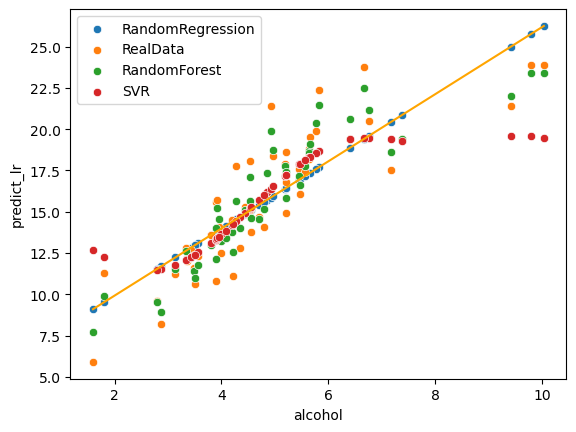

In [115]:
sns.scatterplot(x=df_crashes.alcohol,y=df_crashes.predict_lr,label='RandomRegression');
sns.scatterplot(x=df_crashes.alcohol,y=df_crashes.accidents,label='RealData');
sns.lineplot(x=df_crashes.alcohol,y=df_crashes.predict_lr,color='orange');
sns.scatterplot(x=df_crashes.alcohol,y=df_crashes.predict_rf,label='RandomForest');
sns.scatterplot(x=df_crashes.alcohol,y=df_crashes.predict_sv,label='SVR');

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.